In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.utils import resample
import os

In [62]:
# Llegim el nom dels nodes.
# Obrim el fitxer '.txt' i  llegim les linies.
with open('mindboggle_ROIs_class.txt', 'r') as file:
    header_line = file.readline().strip()

    data = []

    for line in file:
        values = line.strip().split('\t')
        data.append(values)

dict_data = dict()
for i in data:
    node=int(i[0])-1
    dict_data[str(node)] = i[1]
#dict_data

### Global Metrics

In [63]:
# Read CSV File.
#file_metrics = 'table_metrics_functional.csv'
file_metrics = 'table_metrics_structural.csv'
#file_metrics = 'table_metrics_morphological.csv'

df = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,36.863295,0.532982,0.254582,0.029725,36.184211,0.481635,0.468766,1.631579,0.001557,24.359328
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,36.426743,0.556842,0.214401,0.048190,32.644737,0.531637,0.514073,1.355263,0.005998,21.046452
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,37.114127,0.560000,0.248832,0.037827,20.710526,0.427637,0.426370,1.618421,0.000099,24.696861
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,35.441973,0.558246,0.242765,0.022968,23.407895,0.459459,0.452782,1.631579,0.000890,23.054592
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,36.577660,0.556140,0.226521,0.026279,0.157895,0.381667,0.419038,2.026316,0.000000,22.904074


In [64]:
print(f"Connexions MS: {np.mean(list(df[df['controls_ms'] == 1]['edges']))}")
print(f"Connexions HV: {np.mean(list(df[df['controls_ms'] == 0]['edges']))}")

Connexions MS: 1788.2515305289305
Connexions HV: 1853.8712758410888


* Implementa la imputació de valors nuls per assegurar-te un bon anàlisi davant les dades incompletes.

In [65]:
# Imputació de valors null
# Check which columns has null values.
for variable in df.columns:
    if df[variable].isna().any():
        print(f"Column {variable} needs imputation in NULL values.")


Column Unnamed_0 needs imputation in NULL values.
Column redcap_event_name needs imputation in NULL values.
Column age needs imputation in NULL values.
Column sex needs imputation in NULL values.
Column dd needs imputation in NULL values.
Column mstype needs imputation in NULL values.
Column dmd needs imputation in NULL values.
Column edss needs imputation in NULL values.
Column uGMSSS needs imputation in NULL values.
Column oGMSSS needs imputation in NULL values.
Column sdmt needs imputation in NULL values.
Column sdmtz needs imputation in NULL values.
Column pasat needs imputation in NULL values.
Column zpasat needs imputation in NULL values.
Column zverbalmemory needs imputation in NULL values.
Column zvisualmemory needs imputation in NULL values.
Column zattention needs imputation in NULL values.
Column zfluency needs imputation in NULL values.
Column zglobal needs imputation in NULL values.
Column FA needs imputation in NULL values.
Column GM needs imputation in NULL values.
Colum

In [66]:
# Summary of all columns
df.describe()

,Var1,Unnamed_0,controls_ms,age,sex,dd,mstype,dmd,edss,uGMSSS,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
count,265.000000,165.000000,265.000000,165.000000,165.000000,165.000000,165.000000,146.000000,165.000000,147.000000,...,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,132.000000,82.000000,0.554717,46.161529,0.278788,14.110788,0.060606,2.527397,2.369697,3.031156,...,36.734383,0.553667,0.262696,0.040258,11.252681,0.418355,0.441580,1.626812,0.000894,23.918516
std,76.643112,47.775517,0.497937,10.602227,0.449768,10.051942,0.591577,3.167062,1.802689,2.008814,...,1.056526,0.024674,0.026311,0.012476,13.888248,0.047085,0.025274,0.215135,0.001621,1.169071
min,0.000000,0.000000,0.000000,22.660000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.490000,...,33.969592,0.417193,0.202298,0.005429,0.065789,0.338187,0.414323,1.355263,0.000000,17.029192
25%,66.000000,41.000000,0.000000,38.210000,0.000000,7.750000,0.000000,0.000000,1.500000,1.415000,...,36.263007,0.548421,0.244418,0.032136,0.118421,0.386023,0.424559,1.447368,0.000000,23.140097
50%,132.000000,82.000000,1.000000,46.330000,0.000000,12.400000,0.000000,1.000000,2.000000,2.530000,...,36.519646,0.562105,0.260744,0.040275,4.855263,0.389029,0.428779,1.592105,0.000262,24.312542
75%,198.000000,123.000000,1.000000,53.840000,1.000000,19.600000,0.000000,4.750000,3.000000,4.395000,...,36.877171,0.568070,0.276934,0.047567,22.723684,0.447757,0.448806,1.644737,0.001097,24.620027
max,264.000000,164.000000,1.000000,72.220000,1.000000,46.130000,2.000000,14.000000,7.500000,9.290000,...,43.998021,0.582105,0.349606,0.100195,44.671053,0.531637,0.521677,2.723684,0.015482,25.774593


In [67]:
# Select the required columns.
columns_x = ['age', 'sex', 'edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity', 'transitivity', 'strength']

# Fill missing values using the mean().
#df.fillna(df.mean(), inplace=True)

X = df[columns_x]
X.head()

,age,sex,edges,degree,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,51.53,1.0,1850.798878,20.039474,36.863295,0.532982,0.254582,0.029725,36.184211,0.481635,0.468766,1.631579,0.001557,24.359328
1,58.06,0.0,1597.222308,21.065789,36.426743,0.556842,0.214401,0.048190,32.644737,0.531637,0.514073,1.355263,0.005998,21.046452
2,60.78,1.0,1876.849518,21.013158,37.114127,0.560000,0.248832,0.037827,20.710526,0.427637,0.426370,1.618421,0.000099,24.696861
3,37.95,0.0,1751.758987,20.973684,35.441973,0.558246,0.242765,0.022968,23.407895,0.459459,0.452782,1.631579,0.000890,23.054592
4,52.64,0.0,1740.709588,20.855263,36.577660,0.556140,0.226521,0.026279,0.157895,0.381667,0.419038,2.026316,0.000000,22.904074


In [68]:
y = df['controls_ms']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: controls_ms, dtype: int64

In [69]:
df_HV = df[df['controls_ms'] == 0]
df_MS = df[df['controls_ms'] == 1]


In [70]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics = list()
list_bonferroni_correction = dict()
num_matrius = len(df)

for metric in ['edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity','transitivity', 'strength']:
    dades_HV = df[df['controls_ms'] == 0][metric]
    dades_MS = df[df['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction[metric] = pval_corrected   
        list_significative_metrics.append(metric)
        

Metric: edges pvalue: 6.329412154888033e-05
Metric: degree pvalue: 1.4466560142857958e-19
Metric: density pvalue: 4.0431462860444435e-22
Metric: betw_centr pvalue: 2.0005112059832295e-20
Metric: eglob pvalue: 0.0001048024418510781
Metric: eloc pvalue: 1.2936956942731916e-15
Metric: transitivity pvalue: 1.0408148365918528e-16
Metric: strength pvalue: 6.839531859777875e-05


In [71]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction.keys())

['edges',
 'degree',
 'density',
 'betw_centr',
 'eglob',
 'eloc',
 'transitivity',
 'strength']

In [72]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction.keys()):
    mean_MS_ = np.mean(df_MS[metric])
    std_MS_ = np.std(df_MS[metric])
    
    mean_HV_ = np.mean(df_MS[metric])
    std_HV_ = np.std(df_MS[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - edges: MS: 1788.2515305289305 (104.312799415269), HV: 1788.2515305289305 (104.312799415269), Pvalue: 6.329412154888033e-05 

Metric - degree: MS: 20.414786967418546 (1.082859409202027), HV: 20.414786967418546 (1.082859409202027), Pvalue: 1.4466560142857958e-19 

Metric - density: MS: 0.543313044516052 (0.028607933098715746), HV: 0.543313044516052 (0.028607933098715746), Pvalue: 4.0431462860444435e-22 

Metric - betw_centr: MS: 17.16675617615467 (14.072443308220834), HV: 17.16675617615467 (14.072443308220834), Pvalue: 2.0005112059832295e-20 

Metric - eglob: MS: 0.43346936786410467 (0.04997941634574639), HV: 0.43346936786410467 (0.04997941634574639), Pvalue: 0.0001048024418510781 

Metric - eloc: MS: 0.4496716009043846 (0.025879044051675203), HV: 0.4496716009043846 (0.025879044051675203), Pvalue: 1.2936956942731916e-15 

Metric - transitivity: MS: 0.001290896169146632 (0.0017850173125943947), HV: 0.001290896169146632 (0.001785

In [73]:
#list_significative_metrics.append('sex')
#list_significative_metrics.append('age')

# Llistat a utilitzar per aplicar models ML.
print(list(list_significative_metrics))

['edges', 'degree', 'density', 'betw_centr', 'eglob', 'eloc', 'transitivity', 'strength']


Training set - Features: (212, 8), Labels: (212,)
Testing set - Features: (53, 8) Labels: (53,)


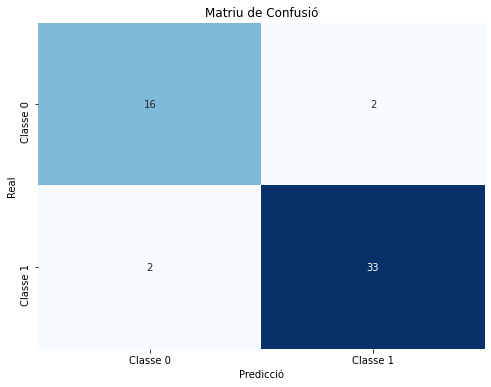

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.94      0.94      0.94        35

    accuracy                           0.92        53
   macro avg       0.92      0.92      0.92        53
weighted avg       0.92      0.92      0.92        53



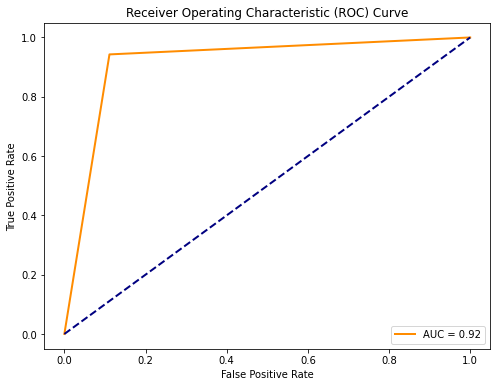

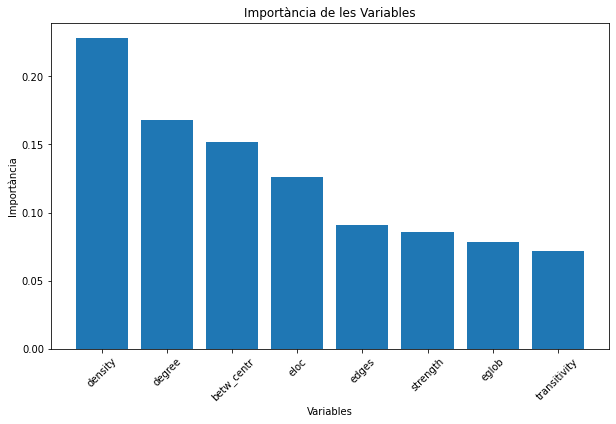

In [74]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: Support Vector Machine**

Training set - Features: (212, 8), Labels: (212,)
Testing set - Features: (53, 8) Labels: (53,)


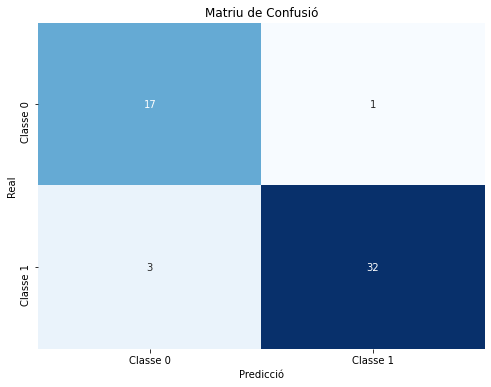

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.97      0.91      0.94        35

    accuracy                           0.92        53
   macro avg       0.91      0.93      0.92        53
weighted avg       0.93      0.92      0.93        53



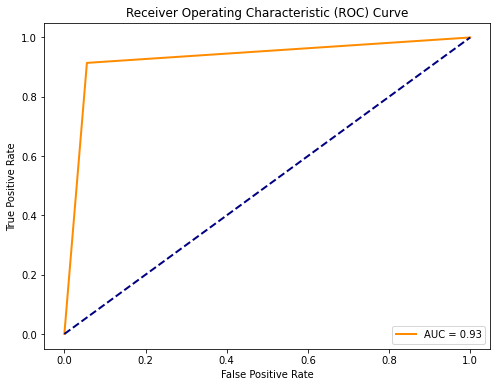

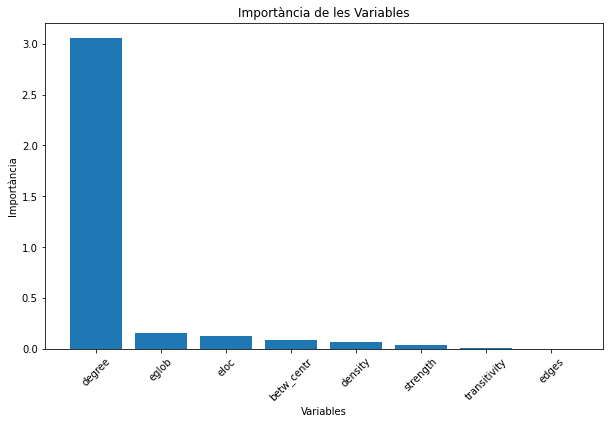

In [75]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: KNN**

Training set - Features: (212, 8), Labels: (212,)
Testing set - Features: (53, 8) Labels: (53,)


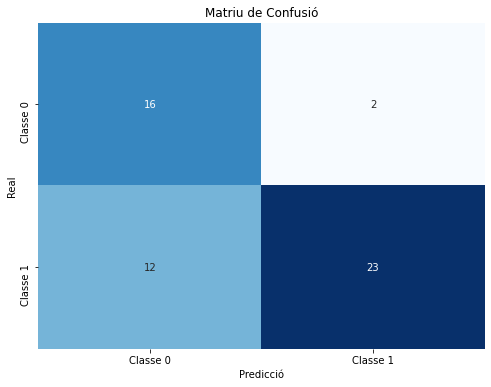

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.89      0.70        18
           1       0.92      0.66      0.77        35

    accuracy                           0.74        53
   macro avg       0.75      0.77      0.73        53
weighted avg       0.80      0.74      0.74        53



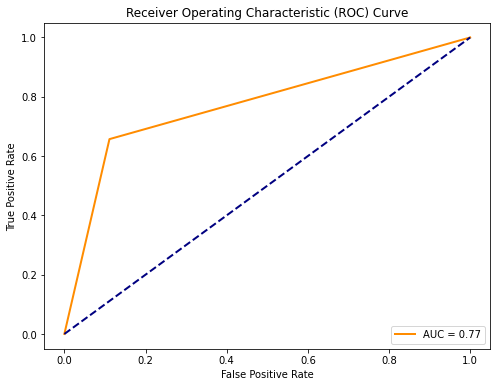

In [76]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* **Global: Logistic Regression**

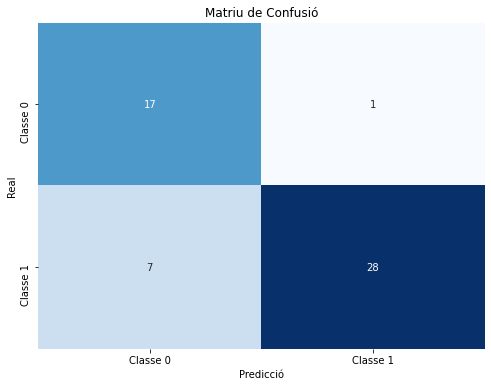

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.97      0.80      0.88        35

    accuracy                           0.85        53
   macro avg       0.84      0.87      0.84        53
weighted avg       0.88      0.85      0.85        53



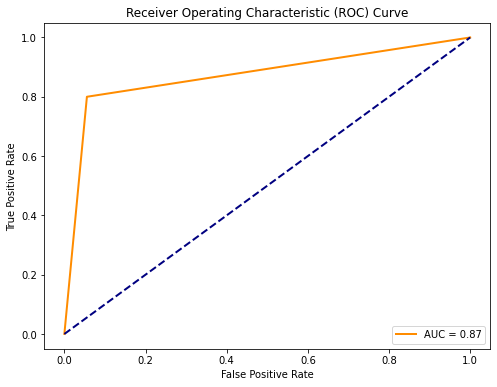

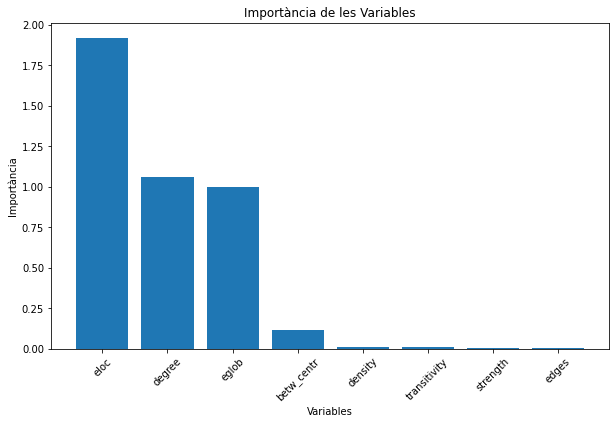

In [77]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: Gaussian Naive Bayes**

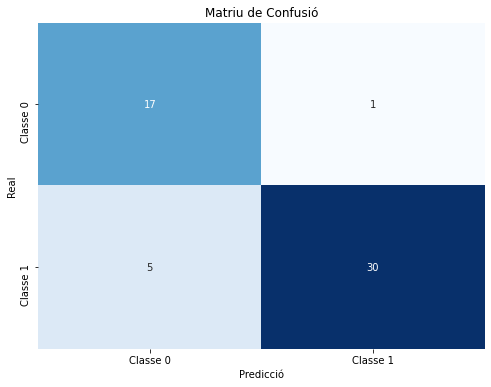

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.97      0.86      0.91        35

    accuracy                           0.89        53
   macro avg       0.87      0.90      0.88        53
weighted avg       0.90      0.89      0.89        53



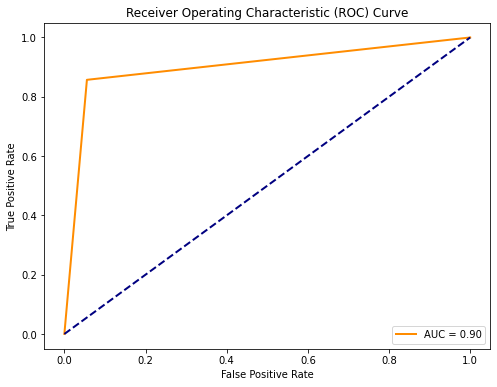

In [78]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Local Metrics

In [94]:
# Read CSV File.
#file_metrics = 'table_metrics_local_functional.csv'
file_metrics = 'table_metrics_local_structural.csv'
#file_metrics = 'table_metrics_local_morphological.csv'

df_local = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df_local.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,modularity_66,modularity_67,modularity_68,modularity_69,modularity_70,modularity_71,modularity_72,modularity_73,modularity_74,modularity_75
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,2,2,2,2,2,2,2,2,2,2
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,1,1,1,1,1,1,1,1,1,1
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,1,1,1,1,1,1,1,1,1,1
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,1,1,1,1,1,1,1,1,1,1
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,2,2,2,2,2,2,2,2,2,2


In [95]:
# Obtenim el llistat de mètriques locals.
# Get index of 'degree_0'.
index_of_degree0 = df_local.columns.get_loc('degree_0')
list_local_metrics = list(df_local.columns)[index_of_degree0:]


In [96]:
df_MS_local = df_local[df_local['controls_ms'] == 1]
df_HV_local = df_local[df_local['controls_ms'] == 0]

In [97]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics_local = list()
list_bonferroni_correction_local = dict()
num_matrius = len(df)

for metric in list_local_metrics:
    dades_HV = df_local[df_local['controls_ms'] == 0][metric]
    dades_MS = df_local[df_local['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction_local[metric] = pval_corrected   
        list_significative_metrics_local.append(metric)
        

Metric: degree_0 pvalue: 7.171062469522277e-17
Metric: degree_3 pvalue: 1.518477112549306e-05
Metric: degree_8 pvalue: 0.014042193613272034
Metric: degree_19 pvalue: 9.098478162955167e-05
Metric: degree_29 pvalue: 0.025046956213728887
Metric: degree_31 pvalue: 0.009707044600015119
Metric: degree_32 pvalue: 2.5172325664418153e-06
Metric: degree_35 pvalue: 1.1273044642257597e-13
Metric: degree_36 pvalue: 8.249201097129097e-08
Metric: degree_37 pvalue: 0.005378971413705027
Metric: degree_39 pvalue: 1.1011503169215919e-13
Metric: degree_42 pvalue: 2.404464091604424e-19
Metric: degree_44 pvalue: 7.643544974977009e-17
Metric: degree_52 pvalue: 9.90046494553378e-06
Metric: degree_53 pvalue: 1.144398726823096e-06
Metric: degree_55 pvalue: 4.994936316214884e-06
Metric: degree_57 pvalue: 1.4699746500700244e-07
Metric: degree_58 pvalue: 4.971364381230432e-09


/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: degree_61 pvalue: 0.0013605562706118968
Metric: degree_63 pvalue: 3.806585692032426e-12
Metric: degree_69 pvalue: 5.708008173103208e-16
Metric: degree_72 pvalue: 3.753183792590691e-06
Metric: betw_centr_0 pvalue: 9.33546286846969e-17
Metric: betw_centr_1 pvalue: 5.1679601293343075e-15
Metric: betw_centr_5 pvalue: 1.4929746536845875e-15
Metric: betw_centr_7 pvalue: 1.301715653939653e-16
Metric: betw_centr_9 pvalue: 4.2959831398291597e-13
Metric: betw_centr_11 pvalue: 2.1769822938050634e-12
Metric: betw_centr_12 pvalue: 9.234697207526116e-12
Metric: betw_centr_14 pvalue: 1.369999699051245e-10
Metric: betw_centr_15 pvalue: 2.2287193247734216e-14
Metric: betw_centr_16 pvalue: 0.015018504667510323
Metric: betw_centr_17 pvalue: 2.1964028604955478e-11
Metric: betw_centr_19 pvalue: 4.871472287861689e-13
Metric: betw_centr_20 pvalue: 4.135444978169103e-08
Metric: betw_centr_21 pvalue: 2.850649962651273e-14
Metric: betw_centr_22 pvalue: 9.395689371466876e-20
Metric: betw_centr_23 pvalue:

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: betw_centr_42 pvalue: 0.00018087006022945025
Metric: betw_centr_46 pvalue: 1.035885058989662e-09
Metric: betw_centr_48 pvalue: 0.0007774322966913348
Metric: betw_centr_49 pvalue: 5.890169468867544e-05
Metric: betw_centr_50 pvalue: 4.4591361698146786e-07
Metric: betw_centr_51 pvalue: 1.1799015268856922e-05
Metric: betw_centr_52 pvalue: 3.8002726995761547e-07
Metric: betw_centr_53 pvalue: 0.005332551182535375
Metric: betw_centr_54 pvalue: 0.0006139525201811539
Metric: betw_centr_56 pvalue: 2.6434600587779204e-08
Metric: betw_centr_57 pvalue: 5.149003705445137e-13
Metric: betw_centr_60 pvalue: 1.5858305886580604e-09
Metric: betw_centr_62 pvalue: 0.0007403378805908039
Metric: betw_centr_64 pvalue: 0.01062043209536531
Metric: betw_centr_65 pvalue: 6.190451423632896e-07
Metric: betw_centr_66 pvalue: 0.000564213133085774
Metric: betw_centr_67 pvalue: 6.951175475248856e-07
Metric: eigenv_centr_0 pvalue: 3.660946585148448e-14
Metric: eigenv_centr_1 pvalue: 1.9728304779004417e-18
Metric:

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: eigenv_centr_18 pvalue: 2.012409066375641e-15
Metric: eigenv_centr_19 pvalue: 5.4623186183951327e-17
Metric: eigenv_centr_20 pvalue: 4.6008051550039184e-17
Metric: eigenv_centr_21 pvalue: 1.3633551183732574e-16
Metric: eigenv_centr_22 pvalue: 3.741207859667695e-16
Metric: eigenv_centr_23 pvalue: 4.564552347662251e-16
Metric: eigenv_centr_24 pvalue: 7.844194335845177e-17
Metric: eigenv_centr_25 pvalue: 1.736151824339813e-14
Metric: eigenv_centr_26 pvalue: 2.9005731217100447e-14
Metric: eigenv_centr_27 pvalue: 2.0710361534550197e-14
Metric: eigenv_centr_28 pvalue: 2.9005731217100447e-14
Metric: eigenv_centr_29 pvalue: 3.624805935086938e-11
Metric: eigenv_centr_30 pvalue: 2.0464489173501673e-12
Metric: eigenv_centr_31 pvalue: 1.215875249084497e-12
Metric: eigenv_centr_32 pvalue: 2.8380975287512895e-12
Metric: eigenv_centr_33 pvalue: 1.7939543201997638e-12
Metric: eigenv_centr_34 pvalue: 4.2609010332649846e-10
Metric: eigenv_centr_35 pvalue: 2.438846184012773e-10
Metric: eigenv_cen

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: pager_centr_2 pvalue: 9.472186327427442e-16
Metric: pager_centr_3 pvalue: 0.00014197979938499882
Metric: pager_centr_10 pvalue: 2.3927251525117997e-05
Metric: pager_centr_13 pvalue: 5.177148270756898e-07
Metric: pager_centr_16 pvalue: 9.62869498539544e-05
Metric: pager_centr_18 pvalue: 0.0008857436816319513
Metric: pager_centr_25 pvalue: 0.049907421418522425
Metric: pager_centr_29 pvalue: 1.1536624334789049e-05
Metric: pager_centr_35 pvalue: 3.708481955456174e-09
Metric: pager_centr_37 pvalue: 6.501745929407731e-07
Metric: pager_centr_39 pvalue: 0.001409441372117224
Metric: pager_centr_44 pvalue: 1.4609381622320974e-08
Metric: pager_centr_45 pvalue: 0.008317934593580406
Metric: pager_centr_46 pvalue: 4.796833148279355e-05
Metric: pager_centr_47 pvalue: 4.800965891117353e-06
Metric: pager_centr_49 pvalue: 0.03147060758625073
Metric: pager_centr_50 pvalue: 0.0007165526686510425
Metric: pager_centr_51 pvalue: 0.00035744594068628436
Metric: pager_centr_52 pvalue: 8.47015687583061e-

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: local_ef_1 pvalue: 1.4569560661846707e-13
Metric: local_ef_2 pvalue: 0.019333420518151304
Metric: local_ef_5 pvalue: 3.2806911596063155e-06
Metric: local_ef_6 pvalue: 0.0002495715220974856
Metric: local_ef_7 pvalue: 3.016481085528675e-07
Metric: local_ef_8 pvalue: 1.3109152862425927e-08
Metric: local_ef_9 pvalue: 0.03085264396889379
Metric: local_ef_10 pvalue: 0.0014310932915046629
Metric: local_ef_11 pvalue: 3.225980398940367e-09
Metric: local_ef_12 pvalue: 3.821965846360175e-05
Metric: local_ef_14 pvalue: 1.0986753830671882e-10
Metric: local_ef_15 pvalue: 1.3327755388503234e-09
Metric: local_ef_16 pvalue: 0.000245304104173871
Metric: local_ef_17 pvalue: 3.2504176632791574e-10
Metric: local_ef_19 pvalue: 7.497884145114869e-14
Metric: local_ef_20 pvalue: 7.845958083299552e-08
Metric: local_ef_21 pvalue: 1.3397923355259659e-11
Metric: local_ef_22 pvalue: 5.138524873951711e-08
Metric: local_ef_23 pvalue: 2.0949600074093128e-10
Metric: local_ef_24 pvalue: 8.796957109819034e-08
Met

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: strength_44 pvalue: 0.004082478793887539
Metric: strength_45 pvalue: 2.2319469398764037e-12
Metric: strength_50 pvalue: 2.807492978916938e-05
Metric: strength_51 pvalue: 0.009052350188978691
Metric: strength_52 pvalue: 4.877355632464444e-07
Metric: strength_56 pvalue: 0.03541496925396795
Metric: strength_57 pvalue: 0.008376905066820503
Metric: strength_59 pvalue: 0.000592585337562968
Metric: strength_60 pvalue: 0.04349136741731548
Metric: strength_61 pvalue: 4.6405090268926403e-07
Metric: strength_65 pvalue: 2.8075073945369836e-09
Metric: strength_72 pvalue: 0.0026013060095135053
Metric: strength_75 pvalue: 0.006212888228756439


In [98]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction_local.keys())

['degree_0',
 'degree_3',
 'degree_8',
 'degree_19',
 'degree_29',
 'degree_31',
 'degree_32',
 'degree_35',
 'degree_36',
 'degree_37',
 'degree_39',
 'degree_42',
 'degree_44',
 'degree_52',
 'degree_53',
 'degree_55',
 'degree_57',
 'degree_58',
 'degree_61',
 'degree_63',
 'degree_69',
 'degree_72',
 'betw_centr_0',
 'betw_centr_1',
 'betw_centr_5',
 'betw_centr_7',
 'betw_centr_9',
 'betw_centr_11',
 'betw_centr_12',
 'betw_centr_14',
 'betw_centr_15',
 'betw_centr_16',
 'betw_centr_17',
 'betw_centr_19',
 'betw_centr_20',
 'betw_centr_21',
 'betw_centr_22',
 'betw_centr_23',
 'betw_centr_24',
 'betw_centr_25',
 'betw_centr_26',
 'betw_centr_27',
 'betw_centr_28',
 'betw_centr_30',
 'betw_centr_31',
 'betw_centr_32',
 'betw_centr_33',
 'betw_centr_34',
 'betw_centr_37',
 'betw_centr_38',
 'betw_centr_39',
 'betw_centr_40',
 'betw_centr_41',
 'betw_centr_42',
 'betw_centr_46',
 'betw_centr_48',
 'betw_centr_49',
 'betw_centr_50',
 'betw_centr_51',
 'betw_centr_52',
 'betw_centr_53'

In [99]:
len(list_bonferroni_correction_local)

249

In [100]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction_local.keys()):
    mean_MS_ = np.mean(df_MS_local[metric])
    std_MS_ = np.std(df_MS_local[metric])
    
    mean_HV_ = np.mean(df_MS_local[metric])
    std_HV_ = np.std(df_MS_local[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction_local[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - degree_0: MS: 3.312925170068027 (3.5985687273632756), HV: 3.312925170068027 (3.5985687273632756), Pvalue: 7.171062469522277e-17 

Metric - degree_3: MS: 0.6802721088435374 (0.46637106125177163), HV: 0.6802721088435374 (0.46637106125177163), Pvalue: 1.518477112549306e-05 

Metric - degree_8: MS: 6.843537414965986 (0.4317450789829233), HV: 6.843537414965986 (0.4317450789829233), Pvalue: 0.014042193613272034 

Metric - degree_19: MS: 11.564625850340136 (1.0946252563543226), HV: 11.564625850340136 (1.0946252563543226), Pvalue: 9.098478162955167e-05 

Metric - degree_29: MS: 11.680272108843537 (1.0878825126505745), HV: 11.680272108843537 (1.0878825126505745), Pvalue: 0.025046956213728887 

Metric - degree_31: MS: 30.591836734693878 (1.0988868953257154), HV: 30.591836734693878 (1.0988868953257154), Pvalue: 0.009707044600015119 

Metric - degree_32: MS: 25.843537414965986 (1.84317339579527), HV: 25.843537414965986 (1.84317339579527)

Metric - pager_centr_29: MS: 0.009327969417178528 (0.015635129927038322), HV: 0.009327969417178528 (0.015635129927038322), Pvalue: 1.1536624334789049e-05 

Metric - pager_centr_35: MS: 0.007056385777216033 (0.0013698987509220021), HV: 0.007056385777216033 (0.0013698987509220021), Pvalue: 3.708481955456174e-09 

Metric - pager_centr_37: MS: 0.004370307695648757 (0.0006948064466902435), HV: 0.004370307695648757 (0.0006948064466902435), Pvalue: 6.501745929407731e-07 

Metric - pager_centr_39: MS: 0.007020925655337636 (0.001126512832621413), HV: 0.007020925655337636 (0.001126512832621413), Pvalue: 0.001409441372117224 

Metric - pager_centr_44: MS: 0.00485381564327378 (0.0007497825058581917), HV: 0.00485381564327378 (0.0007497825058581917), Pvalue: 1.4609381622320974e-08 

Metric - pager_centr_45: MS: 0.005779268933435868 (0.002879841611887227), HV: 0.005779268933435868 (0.002879841611887227), Pvalue: 0.008317934593580406 

Metric - pager_centr_46: MS: 0.00572920020482192 (0.00309458508765

* **Local: Random Forest Classifier**

Training set - Features: (212, 249), Labels: (212,)
Testing set - Features: (53, 249) Labels: (53,)


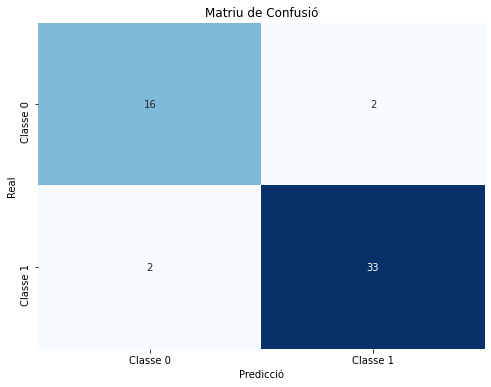

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.94      0.94      0.94        35

    accuracy                           0.92        53
   macro avg       0.92      0.92      0.92        53
weighted avg       0.92      0.92      0.92        53



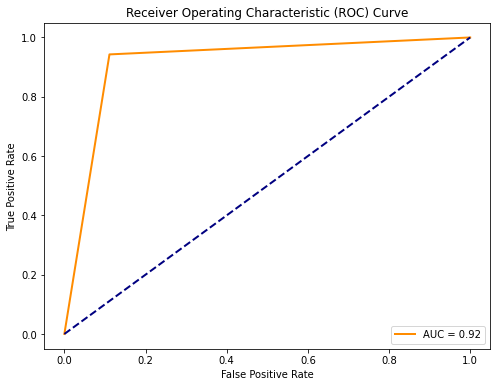

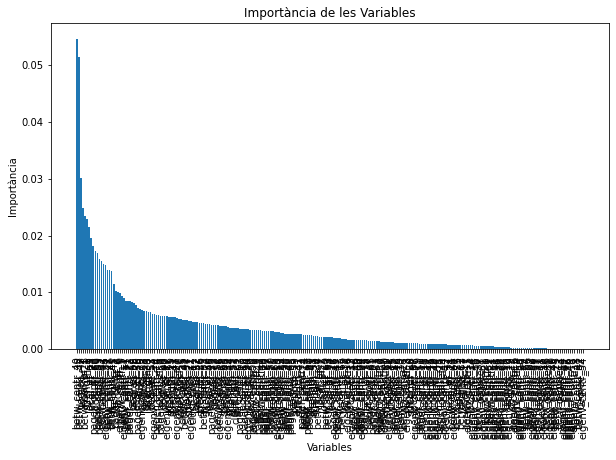

In [105]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: Support Vector Machine (SVM)**

Training set - Features: (212, 249), Labels: (212,)
Testing set - Features: (53, 249) Labels: (53,)


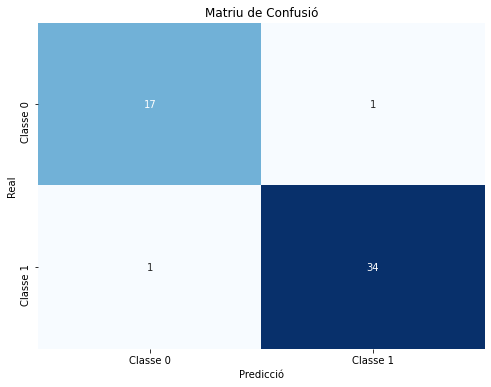

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.97      0.97      0.97        35

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



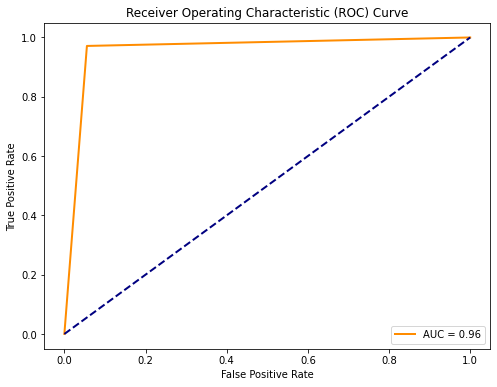

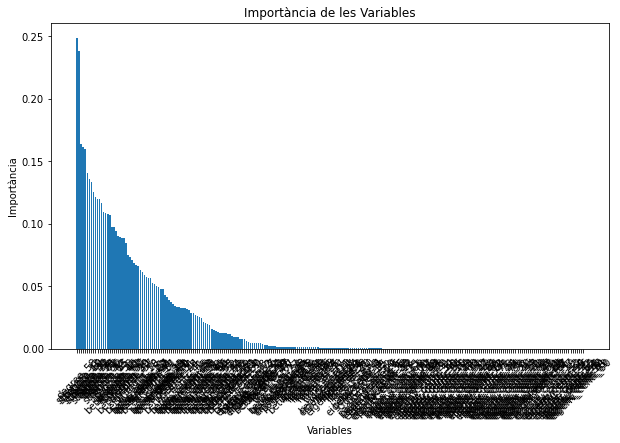

In [87]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: KNN** 

Training set - Features: (212, 249), Labels: (212,)
Testing set - Features: (53, 249) Labels: (53,)


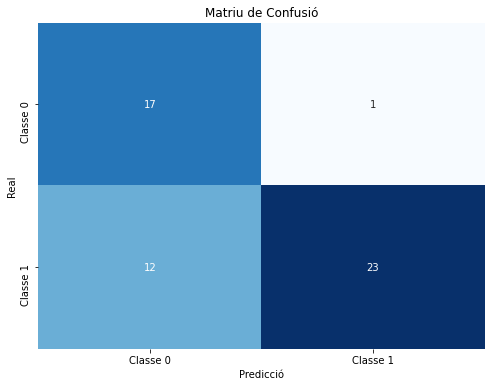

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.94      0.72        18
           1       0.96      0.66      0.78        35

    accuracy                           0.75        53
   macro avg       0.77      0.80      0.75        53
weighted avg       0.83      0.75      0.76        53



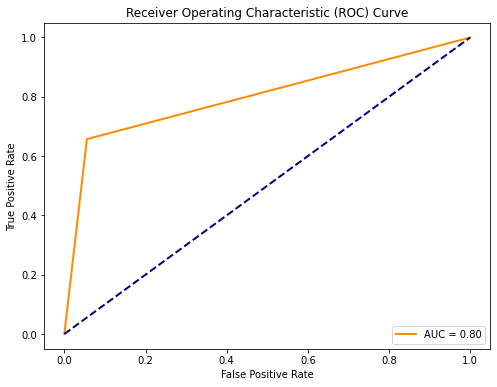

In [88]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* **Local: Logistic regression**

/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


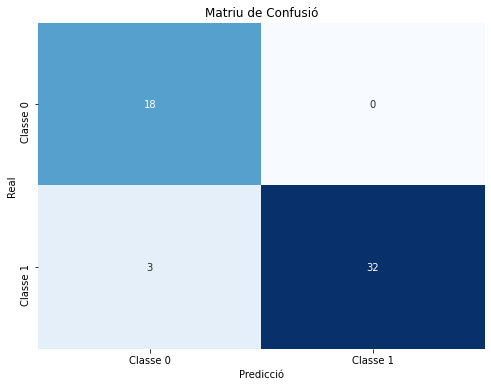

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.91      0.96        35

    accuracy                           0.94        53
   macro avg       0.93      0.96      0.94        53
weighted avg       0.95      0.94      0.94        53



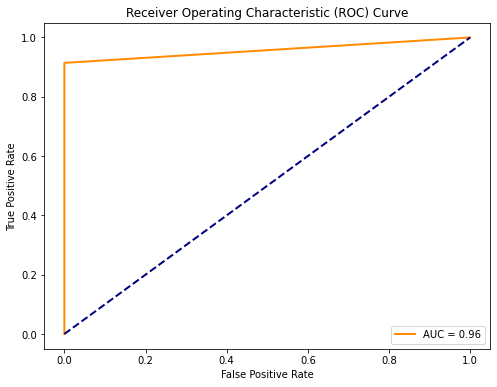

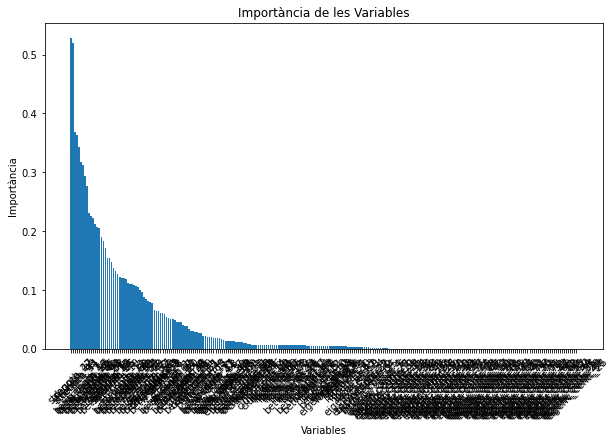

In [89]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: Gaussian Naive Bayes (GNB)**

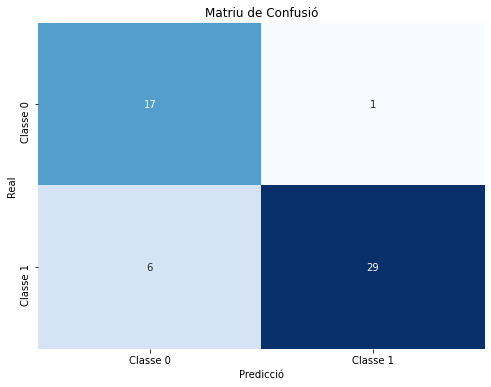

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.97      0.83      0.89        35

    accuracy                           0.87        53
   macro avg       0.85      0.89      0.86        53
weighted avg       0.89      0.87      0.87        53



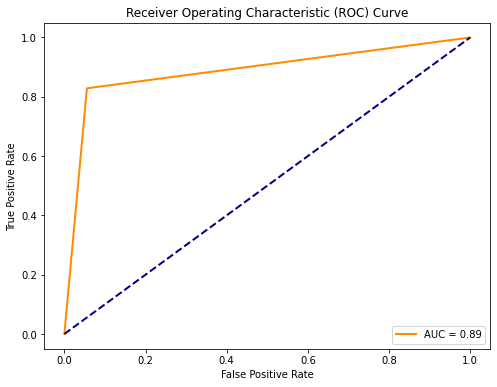

In [90]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* Clinical and demographic characteristics of the subjects included in the study.

In [29]:
# Construct Table 1 (Clinic and demographic characteristics of the subjects).

demographic_features_variables = ['sex', 'age']
demographic_features_variables_dict = dict()

for var in demographic_features_variables:
    dades_HV = df_HV[var]
    dades_MS = df_MS[var]

    normalitat_HV = check_normality(dades_HV, 0.05)
    normalitat_MS = check_normality(dades_MS, 0.05)
    
    if normalitat_HV and normalitat_MS:
        _, pvalue_t = ttest_ind(dades_HV, dades_MS)
        #print("pvalue_t:", pvalue_t)
        demographic_features_variables_dict[var] = pvalue_t
    
    # Prova mostres independents.
    else:
        _, pvalue_u = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
        #print("pvalue_u:", pvalue_u)
        demographic_features_variables_dict[var] = pvalue_u
        

In [30]:
# RRMS: 0, SPMS: 1, PPMS (2)
RRMS = df_MS[df_MS['mstype'] == 0].count()['mstype']
SPMS = df_MS[df_MS['mstype'] == 1].count()['mstype']
PPMS = df_MS[df_MS['mstype'] == 2].count()['mstype']

perc_RRMS = RRMS/len(list(df_MS['mstype']))
perc_SPMS = SPMS/len(list(df_MS['mstype']))
perc_PPMS = PPMS/len(list(df_MS['mstype']))


In [31]:
# Obtenim la mitjana de volum de tots els nodes Controls.
# Llegir excel.
volum_df_HV = pd.read_excel('VOLUM_NODES_CONTROLS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_HV = volum_df_HV.mean()
avg_volum_HV = column_avg_HV.mean()
std_volum_HV = column_avg_HV.std()


# Obtenim la mitjana de volum de tots els nodes MS.
# Llegir excel.
volum_df_MS = pd.read_excel('VOLUM_NODES_PATIENTS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_MS = volum_df_MS.mean()
avg_volum_MS = column_avg_MS.mean()
std_volum_MS = column_avg_MS.std()

# Comprovem la normalitat i calculem el pvalue.
dades_HV = column_avg_HV
dades_MS = column_avg_MS

normalitat_HV = check_normality(dades_HV, 0.05)
normalitat_MS = check_normality(dades_MS, 0.05)

if normalitat_HV and normalitat_MS:
    _, pvalue_volum = ttest_ind(dades_HV, dades_MS)
    print("pvalue_t:", pvalue_volum)

# Prova mostres independents.
else:
    _, pvalue_volum = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    print("pvalue_u:", pvalue_volum)
    

pvalue_u: 0.4622499461255427


In [32]:
print("          'MS patients'     'HV volunteers'    'Pvalue'\n")
print(f"Female (N, %): {(df_MS['sex'] == 0).sum()} ({(df_MS['sex'] == 0).sum()/len(list(df_MS['sex']))}), {(df_HV['sex'] == 0).sum()} ({(df_HV['sex'] == 0).sum()/len(list(df_HV['sex']))}) pvalue: {demographic_features_variables_dict['sex']}")
print(f"Age (years): {np.mean(df_MS['age'])} ({np.std(df_MS['age'])}), {np.mean(df_HV['age'])} ({np.std(df_HV['age'])}), pvalue: {demographic_features_variables_dict['age']}\n")
print("Type of MS:")
print(f"RRMS: {RRMS} ({perc_RRMS})  na  na")
print(f"SPMS: {SPMS} ({perc_SPMS})  na  na")
print(f"PPMS: {PPMS} ({perc_PPMS})  na  na\n")
print(f"Avg Node volum: {avg_volum_MS}, {avg_volum_HV}, p_value: {pvalue_volum}")
print(f"Disease Duration: {np.mean(df_MS['dd'])} ({np.std(df_MS['dd'])}),   na   na  ")
print(f"EDSS Score (gravetat): {np.mean(df_MS['edss'])} ({np.std(df_MS['edss'])}),   na   na  ")
print(f"zSDMT: {np.mean(df_MS['sdmtz'])} ({np.std(df_MS['sdmtz'])}),   na   na  ")
print(f"zPASAT: {np.mean(df_MS['zpasat'])} ({np.std(df_MS['zpasat'])}),   na   na  ")
print(f"zAttention: {np.mean(df_MS['zattention'])} ({np.std(df_MS['zattention'])}),   na   na  ")


          'MS patients'     'HV volunteers'    'Pvalue'

Female (N, %): 104 (0.7074829931972789), 15 (0.8333333333333334) pvalue: 0.26392887381763375
Age (years): 47.33013605442177 (10.110612797350703), 36.617906304661965 (9.332087414451566), pvalue: 3.5658067874371484e-05

Type of MS:
RRMS: 125 (0.8503401360544217)  na  na
SPMS: 16 (0.10884353741496598)  na  na
PPMS: 6 (0.04081632653061224)  na  na

Avg Node volum: 8635.448684210527, 9328.701754385966, p_value: 0.4622499461255427
Disease Duration: 15.961088435374148 (9.01906326713972),   na   na  
EDSS Score (gravetat): 2.6598639455782314 (1.6892883766794917),   na   na  
zSDMT: 0.07902865573770491 (1.0603561342433823),   na   na  
zPASAT: -0.2892552 (1.3281360383373986),   na   na  
zAttention: -0.2857193548387097 (1.0301272962112904),   na   na  


### Visualització en 3D cerebral amb representació dels nodes

In [33]:
# Llegim el fitxer.
df_nodes_coordinates = pd.read_table('Node_mindboggle_default.node', header = None)
df_nodes_coordinates.rename(columns={0: "x", 1: "y", 2: "z", 5: "node_name"}, inplace = True)
df_nodes_coordinates.head()

,x,y,z,3,4,node_name
0,-4.28,16.90,28.3,2,1,ctx-lh-caudalanteriorcingulate
1,-35.20,12.00,46.5,3,1,ctx-lh-caudalmiddlefrontal
2,-6.44,-87.50,25.5,4,1,ctx-lh-cuneus
3,-22.20,-4.61,-35.8,5,1,ctx-lh-entorhinal
4,-33.30,-41.70,-21.6,6,1,ctx-lh-fusiform


In [34]:
# Create an example adjacency matrix (replace this with your own matrix)
matrix = pd.read_csv(
    os.path.join(
        os.getcwd(), 'subject_networks_rfMRI_v1', '002MSVIS_r_matrix.csv'
    ), header=None
)
adjacency_matrix = np.array(matrix)


In [35]:
# Construim el llistat de coordenades de cada node.
node_coordinates = list()

for i in range(0, 76):
    node_name = dict_data[str(i)]
    filtered_df = df_nodes_coordinates[df_nodes_coordinates['node_name'] == node_name]
    node_coordinates.append([float(filtered_df['x']), float(filtered_df['y']), float(filtered_df['z'])])
    

/home/guillem/.local/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


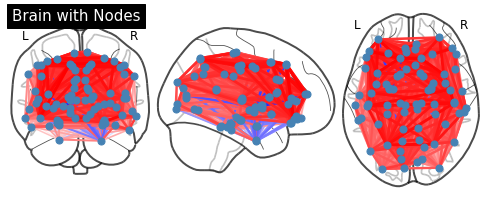

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.connectome import ConnectivityMeasure

# Visualització en 3D cerebral amb representació dels nodes.
plotting.plot_connectome(
    adjacency_matrix=adjacency_matrix,
    node_coords=node_coordinates,
    node_color='steelblue',
    title='Brain with Nodes',
    display_mode='ortho',
    annotate=True,
)
plt.show()